In [1]:
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
# opening the file and preparing the data by removing useless columns
# final data stored in final_result

with open("result.TXT", 'r', encoding='utf-8') as file:
    x = file.readlines()[593:744]
    x.pop(11)
    x.pop(71)
    x.pop(131)
    for line in x:
        if line[0]==' ':
            #print('space')
            pass
        elif line[0]=='\n':
            x.remove(line)
        elif line[0]=='-' or line[0]=='R' or line[0]=='N' or line[0]=='D' or line[0]=='S':
            x.remove(line)
        elif line[0]=='1':
            #print(line[0:10])
            pass
        else:
            x.remove(line)
  
   # print('\n\n-----xxx------------xxxx------------xxx------------\n\n\n')
   
    for line in x:
        if '0' not in line: 
            x.remove(line)
        elif 'DATE' in line:
            x.remove(line)
    for line in x:
        if 'NO      L X' in line:
            x.remove(line)
        elif '-------' in line:
            x.remove(line)
    for line in x:
        if 'NO      L X' in line:
            x.remove(line)
    for line in x:
        if line=='\n':
            x.remove(line)
            
   # print('\n\n-----xxx------------xxxx------------xxx------------\n\n\n')
    #print(x)
    #for line in x:
     #   print(line[:11])
    
    final_result=x

In [4]:
# removing the escape characters from the front and back of each line

for index in range(len(final_result)):
    final_result[index]=final_result[index].strip()

In [5]:
# roll numbers and sex can be directly assigned values using list comprehension

roll = [int(line.split()[0]) for line in final_result if line[0]=='1']
sex= [line.split()[1] for line in final_result if line.split()[1]=='F' or line.split()[1]=='M']

In [6]:
# assigning name values is more complicated due to many student's having a surname, and some even having a middle name

name=[]
for line in final_result:
    if '   F ' in line:
        n=''
        for index in range(len(line.split('   F ')[1])):
            if line.split('   F ')[1][index]==' ' and line.split('   F ')[1][index+1]==' ':break
            else: n+=line.split('   F ')[1][index]
        name.append(n)
    elif '   M ' in line:
        n=''
        for index in range(len(line.split('   M ')[1])):
            if line.split('   M ')[1][index]==' ' and line.split('   M ')[1][index+1]==' ':break
            else: n+=line.split('   M ')[1][index]
        name.append(n)

In [7]:
# this is a handy list containing all the subject codes
subjects=[]
for line in final_result:
    if line.split()[-1]=='PASS':
        for s in line.split()[-9:-4]:
            if s[0]=='0' or s[0]=='3': subjects.append(s)

# converting the list of subjects to a set and back would remove all the repeated subjects the students have in common
# this leaves only unique subjects

subjects=list(set(subjects))
#subjects

In [8]:
# appending subs from students who havent passed

subjects.append('104')       #from sukanti

In [9]:
# these fields below are just initialised, nothing is done with them as such (yet)

marks1=marks2=marks3=marks4=marks5=marks6=marks7=marks8=marks9=marks10=marks11=[None]*55
result=[None]*55
total=[None]*55
percentage=[None]*55
cat=['G']*55

In [10]:
# filling in the result list

result=[]
for line in final_result:
    if line[0]=='1':
        if line.split()[-1]=='PASS' or line.split()[-1]=='R.L.':
            result.append(line.split()[-1])
        else:
            result.append(line.split()[-2]+' '+line.split()[-1])
            # compartments contain two words- COMP and the sub code
            # ESSENTIAL REPEAT is also two words long
#result

In [11]:
# now we find out the marks obtained by each student in each subject
# for the subject not taken by the student, None object is supplied as the value for marks

marks=[]
for index in range(len(final_result)):
    line=final_result[index]
    x=0
    subs={'039':None, '048':None, '029':None, '064':None, '041':None, '302':None, '030':None, '301':None, '027':None, '028':None, '104':None}
    if index==len(final_result)-1: break
        
    if line[0] =='1' and final_result[index+1][0]=='0':
        for s in line.split():
            if s in list(subs.keys()):
                x+=1
                subs[s]=x
        
        i=1
        for s in final_result[index+1].split():
            if s[0]=='0':
                for item in subs.items():
                    if item[1]== i:
                        i+=1
                        subs[item[0]]=int(s)
                        break
        marks.append(subs)

# inserting sukanti's marks        
marks.insert(2, {'039':None, '048':None, '029':None, '064':None, '041':None, '302':None, '030':None, '301':None, '027':None, '028':None, '104':None})

# inserting last r. no.'s marks
marks.append({'039': 78, '048': 87, '029': 79, '064':None, '041':None, '302':None, '030':None, '301':74, '027': 47, '028':None, '104':None})

# the one's with compartment are showing the wrong result
marks[14]={'039':None, '048': 75, '029':None, '064':None, '041': 40, '302':None, '030': 67, '301': 81, '027':None, '028': 56, '104':None}
marks[46]={'039':None, '048': 56, '029':None, '064':None, '041':None, '302':None, '030': 49, '301': 52, '027': 36, '028': 48, '104':None}
marks[47]={'039':None, '048': 73, '029':None, '064':None, '041': 35, '302':None, '030': 69, '301': 74, '027':None, '028': 68, '104':None}
marks[48]={'039':None, '048': 54, '029':None, '064':None, '041':None, '302':None, '030': 33, '301': 70, '027': 48, '028': 47, '104':None}
marks[52]={'039':None, '048':None, '029': 51, '064':None, '041':None, '302': 48, '030':None, '301': 30, '027': 46, '028': 44, '104':None}

In [12]:
# importing the pandas module to fill in all the information into a dataframe

import pandas as pd

In [13]:
# creating the dataframe

df = pd.DataFrame(list(zip(roll, name, sex,cat, marks1, marks2, marks3, marks4, marks5, marks6, marks7, marks8, marks9, marks10, marks11, total, percentage, result)), columns = ['Roll No', 'Name', 'Sex','Category', '039', '048', '029', '064', '041', '302', '030', '301', '027', '028', '104','Total', '%age', 'Result'])
#df.tail(10)

In [14]:
# filling the values of marks into the dataframe
subs={'039':None, '048':None, '029':None, '064':None, '041':None, '302':None, '030':None, '301':None, '027':None, '028':None, '104':None}
cols=list(subs.keys())
#print(marks[0])
i=0
for m in marks:
    for item in m.items():
        df.loc[i,[item[0]]]=item[1]
    i+=1
#df.tail(10)

In [15]:
# importing the numpy module

import numpy as np

In [16]:
# to replace None with first NaN, and then with 0

df.replace(to_replace=[None], value=np.nan, inplace=True)
d=df.fillna(0)
#df.tail(10)

In [17]:
# calculating total

cols=['039', '048', '029', '064', '041', '302', '030', '301', '027', '028', '104']
df['Total'] = df[cols].sum(axis=1)
#df.head()

In [18]:
# calculating percentage

df['%age']=df['Total']/5
#df.head()

In [19]:
# adding scs and obcs
df['Category'][7]='SC'
df['Category'][21]='SC'
df['Category'][22]='SC'
df['Category'][23]='SC'
df['Category'][24]='SC'
df['Category'][25]='SC'
df['Category'][26]='SC'
df['Category'][27]='SC'
df['Category'][28]='SC'
df['Category'][43]='SC'
df['Category'][45]='SC'
df['Category'][46]='SC'
df['Category'][52]='SC'
df['Category'][53]='SC'
df['Category'][54]='SC'
df['Category'][15]='OBC'

<ipython-input-19-1361448426f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'][7]='SC'
<ipython-input-19-1361448426f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'][21]='SC'
<ipython-input-19-1361448426f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'][22]='SC'
<ipython-input-19-1361448426f4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

## The DataFrame containing the entire class

In [20]:
# the complete dataframe has now been made:
df

,Roll No,Name,Sex,Category,039,048,029,064,041,302,030,301,027,028,104,Total,%age,Result
0,13688207,POOJA,F,G,68.0,68.0,NaN,NaN,NaN,NaN,60.0,79.0,54.0,NaN,NaN,329.0,65.8,PASS
1,13688208,KOMAL,F,G,NaN,NaN,NaN,NaN,NaN,91.0,88.0,94.0,90.0,88.0,NaN,451.0,90.2,PASS
2,13688209,SUKANTI,F,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,R.L.
3,13688210,PRISHITA,F,G,NaN,NaN,NaN,85.0,NaN,90.0,85.0,92.0,NaN,77.0,NaN,429.0,85.8,PASS
4,13688211,ANANTHA LAKSHMI MK,F,G,NaN,NaN,87.0,NaN,NaN,86.0,NaN,94.0,69.0,76.0,NaN,412.0,82.4,PASS
5,13688212,ANJALI,F,G,80.0,NaN,83.0,NaN,77.0,80.0,NaN,81.0,NaN,NaN,NaN,401.0,80.2,PASS
6,13688213,GARIMA RANA,F,G,79.0,79.0,NaN,NaN,NaN,NaN,71.0,84.0,74.0,NaN,NaN,387.0,77.4,PASS
7,13688214,RITU,F,SC,84.0,NaN,NaN,82.0,NaN,84.0,77.0,89.0,NaN,NaN,NaN,416.0,83.2,PASS
8,13688215,SIMRAN KAUR,F,G,90.0,NaN,NaN,88.0,NaN,NaN,88.0,91.0,NaN,NaN,89.0,446.0,89.2,PASS
9,13688216,AASHI,F,G,NaN,NaN,NaN,NaN,NaN,80.0,69.0,89.0,75.0,77.0,NaN,390.0,78.0,PASS


## Some statistical figures 

In [21]:
# viewing statistics about the dataframe
# we dont need any info about the Roll nos so we drop that column

df.describe().drop(['Roll No'], axis=1)

,039,048,029,064,041,302,030,301,027,028,104,Total,%age
count,22.000000,37.000000,27.000000,9.000000,7.000000,12.000000,27.000000,54.000000,38.000000,32.000000,5.00000,55.000000,55.000000
mean,69.045455,72.756757,72.333333,77.333333,49.714286,74.916667,69.296296,71.666667,61.263158,70.625000,78.60000,342.345455,68.469091
std,14.224316,12.614818,13.135390,12.509996,13.313080,18.052743,13.903001,15.483406,14.177798,13.941699,14.85934,79.307703,15.861541
min,40.000000,39.000000,47.000000,52.000000,35.000000,48.000000,33.000000,30.000000,35.000000,44.000000,57.00000,0.000000,0.000000
25%,61.000000,67.000000,62.500000,73.000000,43.500000,59.250000,61.000000,60.250000,49.500000,56.000000,69.00000,308.000000,61.600000
50%,70.000000,75.000000,73.000000,82.000000,49.000000,82.000000,70.000000,74.500000,60.000000,74.500000,89.00000,351.000000,70.200000
75%,80.000000,82.000000,81.000000,86.000000,50.000000,87.000000,78.000000,83.750000,69.750000,80.250000,89.00000,396.500000,79.300000
max,90.000000,95.000000,96.000000,88.000000,77.000000,95.000000,92.000000,94.000000,95.000000,94.000000,89.00000,466.000000,93.200000


In [22]:
import matplotlib.pyplot as plt

## How many students took each subject

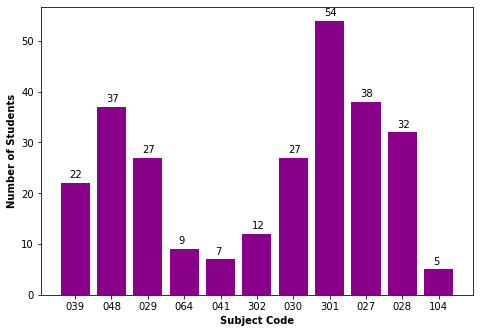

In [23]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
subs=['039','048','029','064','041','302','030','301','027','028', '104']
df1=df.describe().drop(['Roll No'], axis=1)
students = [df1['039']['count'], df1['048']['count'],df1['029']['count'],df1['064']['count'],df1['041']['count'],df1['302']['count'],df1['030']['count'],df1['301']['count'],df1['027']['count'],df1['028']['count'], df1['104']['count']]

#ax.bar(subs, marks, color='DarkMagenta')
ax.set_xlabel('Subject Code', fontweight='bold')
ax.set_ylabel('Number of Students', fontweight='bold')

bars = plt.bar(subs, height=students, width=0.8, color='DarkMagenta')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.25, yval + 1, int(yval))

plt.show()

## Mean score obtained in each subject

### as a bar graph

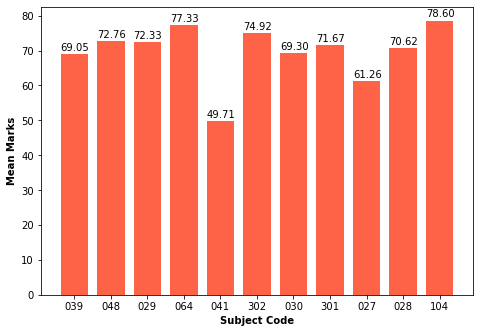

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
subs=['039','048','029','064','041','302','030','301','027','028', '104']
df1=df.describe().drop(['Roll No'], axis=1)
students = [df1['039']['mean'], df1['048']['mean'],df1['029']['mean'],df1['064']['mean'],df1['041']['mean'],df1['302']['mean'],df1['030']['mean'],df1['301']['mean'],df1['027']['mean'],df1['028']['mean'], df1['104']['mean']]

ax.set_xlabel('Subject Code', fontweight='bold')
ax.set_ylabel('Mean Marks', fontweight='bold')

bars = plt.bar(subs, height=students,width=0.75, color='Tomato')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 1, str("%.2f" % round(yval,2)))

plt.show()

### as a line plot

In [25]:
import matplotlib.lines as lines

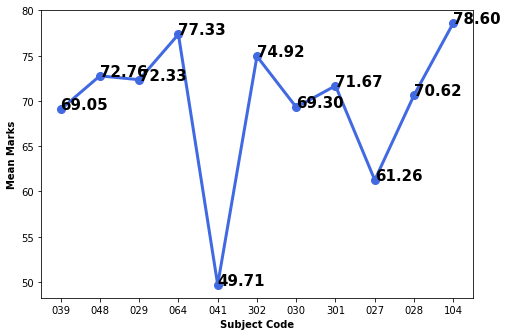

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
subs=['039','048','029','064','041','302','030','301','027','028','104']
df1=df.describe().drop(['Roll No'], axis=1)
mean_marks= [df1['039']['mean'], df1['048']['mean'],df1['029']['mean'],df1['064']['mean'],df1['041']['mean'],df1['302']['mean'],df1['030']['mean'],df1['301']['mean'],df1['027']['mean'],df1['028']['mean'],df1['104']['mean']]

ax.set_xlabel('Subject Code', fontweight='bold')
ax.set_ylabel('Mean Marks', fontweight='bold')

for xy in zip(subs, mean_marks):                                       
    ax.annotate('%.0s%.2f' % xy, xy=xy, textcoords='data', fontsize=15, fontweight="bold")
    
plt.plot(subs, mean_marks, '-o', linewidth=3, markersize=8, color="RoyalBlue")
plt.show()

## minimum and maximum marks in each subject

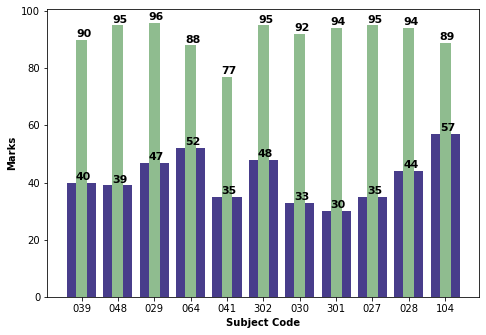

In [27]:
df1=df.describe().drop(['Roll No', 'Total', '%age'], axis=1)[:]
mini = df1.iloc[3, :]
maxi= df1.iloc[7, :]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Subject Code', fontweight='bold')
ax.set_ylabel('Marks', fontweight='bold')

bars= plt.bar(subs, mini, color='DarkSlateBlue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.25, yval+1, int(yval), fontsize=11, fontweight='bold')

bars =plt.bar(subs, maxi, width=0.3, color='DarkSeaGreen')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.0015, yval+1, int(yval), fontsize=11, fontweight='bold')



## student result

In [28]:
passed = [x for x in df['Result'] if x=='PASS']
compartment = [x for x in df['Result'] if 'COMP' in x]
rl = [x for x in df["Result"] if x=='R.L.']
er = [x for x in df['Result'] if 'ESS' in x]

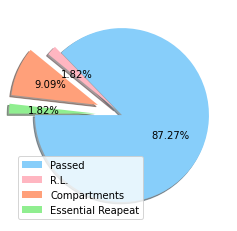

In [29]:
sizes = [len(passed), len(rl), len(compartment), len(er)]
labels = ['Passed','R.L.' ,'Compartments', 'Essential Reapeat']
colors = ['LightSkyBLue', 'LightPink', 'LightSalmon', 'LightGreen']
explode=(0.0,0.1,0.3,0.3)

plt.pie(sizes, explode=explode, colors=colors, autopct='%1.2f%%', shadow = True, startangle=180)
plt.legend(labels, loc='best')
plt.show()

,Passed,Compartments,Essential Reapeat,R.L.
0,48,5,1,1


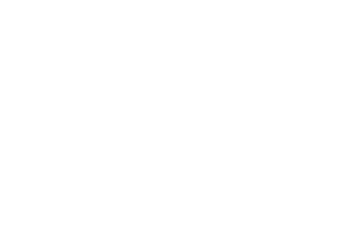

In [30]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df1 = pd.DataFrame.from_dict({'Passed':[len(passed)] ,'Compartments':[len(compartment)], 'Essential Reapeat':[len(er)], 'R.L.':[len(rl)]})
df1

## Some more statistical data

In [31]:
percs=[.1,.20, .3,.40,.5, .60,.7, .80,0.9]
inc=['object', 'float']
df.describe(percentiles=percs).drop('Roll No', axis=1)

,039,048,029,064,041,302,030,301,027,028,104,Total,%age
count,22.000000,37.000000,27.000000,9.000000,7.000000,12.000000,27.000000,54.000000,38.000000,32.000000,5.00000,55.000000,55.000000
mean,69.045455,72.756757,72.333333,77.333333,49.714286,74.916667,69.296296,71.666667,61.263158,70.625000,78.60000,342.345455,68.469091
std,14.224316,12.614818,13.135390,12.509996,13.313080,18.052743,13.903001,15.483406,14.177798,13.941699,14.85934,79.307703,15.861541
min,40.000000,39.000000,47.000000,52.000000,35.000000,48.000000,33.000000,30.000000,35.000000,44.000000,57.00000,0.000000,0.000000
10%,49.500000,55.200000,53.800000,60.800000,38.000000,48.000000,50.800000,52.000000,46.000000,50.500000,61.80000,245.400000,49.080000
20%,57.800000,63.400000,60.400000,69.000000,41.400000,51.000000,60.200000,58.000000,48.000000,56.000000,66.60000,293.800000,58.760000
30%,61.600000,67.800000,64.600000,75.400000,45.600000,68.100000,65.800000,62.800000,52.000000,61.400000,73.00000,316.400000,63.280000
40%,64.200000,69.400000,70.400000,79.600000,47.800000,80.000000,69.000000,70.400000,56.400000,71.200000,81.00000,330.200000,66.040000
50%,70.000000,75.000000,73.000000,82.000000,49.000000,82.000000,70.000000,74.500000,60.000000,74.500000,89.00000,351.000000,70.200000
60%,78.000000,79.000000,79.000000,84.400000,49.600000,85.200000,74.000000,79.000000,66.200000,76.000000,89.00000,369.800000,73.960000


# students and marks distribtion

## subject: 029

In [32]:
dist = []
for i in range(0,10):
    dist.append(len(df.loc[(df['029'] >= i*10) & (df['029'] < i*10+10)]))

In [33]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df1 = pd.DataFrame([], columns=cols)
for i in range(len(dist)):
    df1[cols[i]]=[dist[i]]
df1['Total Students'] = df1[df1.columns].sum(axis=1)
df1

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,Total Students
0,0,0,0,0,1,4,5,8,7,2,27


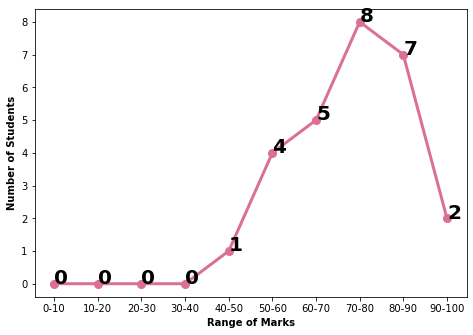

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

ax.set_xlabel('Range of Marks', fontweight='bold')
ax.set_ylabel('Number of Students', fontweight='bold')

for xy in zip(cols, s):                                       
    ax.annotate('%.0s%d' % xy, xy=xy, textcoords='data', fontsize=20, fontweight="bold")
    
plt.plot(cols, s, '-o', linewidth=3, markersize=8, color="PaleVioletRed")
plt.show()

In [35]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

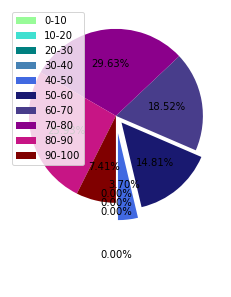

In [36]:
sizes = s
labels = cols
colors = ['PaleGreen','Turquoise', 'Teal', 'SteelBlue', 'RoyalBlue', 'MidnightBlue', 'DarkSlateBlue', 'DarkMagenta','MediumVioletRed','Maroon']
explode=(1,0.5,0.4,0.3,0.2,0.1,0.0,0.0,0.0,0.0)

plt.pie(sizes, explode=explode,colors=colors, autopct='%1.2f%%', startangle=270)
plt.legend(labels, loc='upper left')
plt.show()

## subject: 039

In [37]:
dist = []
for i in range(0,10):
    dist.append(len(df.loc[(df['039'] >= i*10) & (df['039'] < i*10+10)]))

In [38]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df1 = pd.DataFrame([], columns=cols)
for i in range(len(dist)):
    df1[cols[i]]=[dist[i]]
df1['Total Students'] = df1[df1.columns].sum(axis=1)
df1

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,Total Students
0,0,0,0,0,3,2,6,4,6,1,22


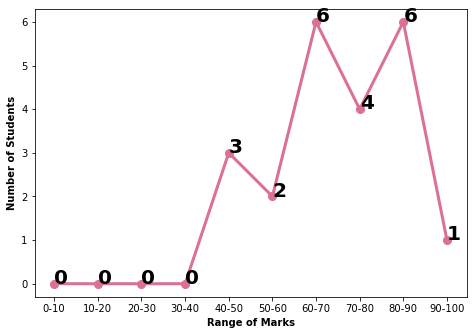

In [39]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

ax.set_xlabel('Range of Marks', fontweight='bold')
ax.set_ylabel('Number of Students', fontweight='bold')

for xy in zip(cols, s):                                       
    ax.annotate('%.0s%d' % xy, xy=xy, textcoords='data', fontsize=20, fontweight="bold")
    
plt.plot(cols, s, '-o', linewidth=3, markersize=8, color="PaleVioletRed")
plt.show()

In [40]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

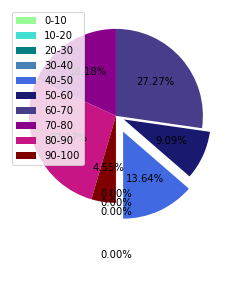

In [41]:
sizes = s
labels = cols
colors = ['PaleGreen','Turquoise', 'Teal', 'SteelBlue', 'RoyalBlue', 'MidnightBlue', 'DarkSlateBlue', 'DarkMagenta','MediumVioletRed','Maroon']
explode=(1,0.5,0.4,0.3,0.2,0.1,0.0,0.0,0.0,0.0)

plt.pie(sizes, explode=explode,colors=colors, autopct='%1.2f%%', startangle=270)
plt.legend(labels, loc='upper left')
plt.show()

## subject: 048

In [42]:
dist = []
for i in range(0,10):
    dist.append(len(df.loc[(df['048'] >= i*10) & (df['048'] < i*10+10)]))

In [43]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df1 = pd.DataFrame([], columns=cols)
for i in range(len(dist)):
    df1[cols[i]]=[dist[i]]
df1['Total Students'] = df1[df1.columns].sum(axis=1)
df1

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,Total Students
0,0,0,0,1,1,4,9,9,11,2,37


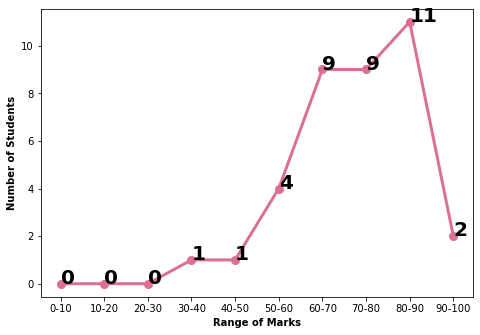

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

ax.set_xlabel('Range of Marks', fontweight='bold')
ax.set_ylabel('Number of Students', fontweight='bold')

for xy in zip(cols, s):                                       
    ax.annotate('%.0s%d' % xy, xy=xy, textcoords='data', fontsize=20, fontweight="bold")
    
plt.plot(cols, s, '-o', linewidth=3, markersize=8, color="PaleVioletRed")
plt.show()

In [45]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

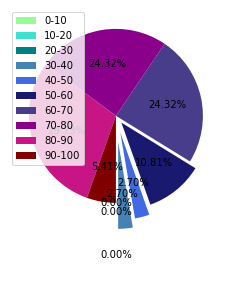

In [46]:
sizes = s
labels = cols
colors = ['PaleGreen','Turquoise', 'Teal', 'SteelBlue', 'RoyalBlue', 'MidnightBlue', 'DarkSlateBlue', 'DarkMagenta','MediumVioletRed','Maroon']
explode=(1,0.5,0.4,0.3,0.2,0.1,0.0,0.0,0.0,0.0)

plt.pie(sizes, explode=explode,colors=colors, autopct='%1.2f%%', startangle=270)
plt.legend(labels, loc='upper left')
plt.show()

## subject: 064

In [47]:
dist = []
for i in range(0,10):
    dist.append(len(df.loc[(df['064'] >= i*10) & (df['064'] < i*10+10)]))

In [48]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df1 = pd.DataFrame([], columns=cols)
for i in range(len(dist)):
    df1[cols[i]]=[dist[i]]
df1['Total Students'] = df1[df1.columns].sum(axis=1)
df1

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,Total Students
0,0,0,0,0,0,1,1,2,5,0,9


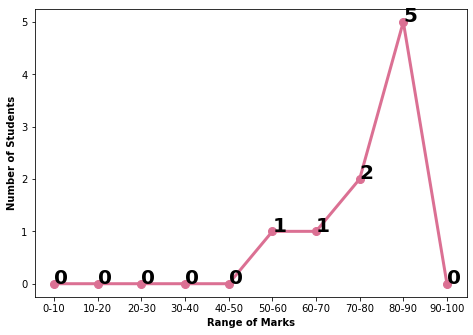

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

ax.set_xlabel('Range of Marks', fontweight='bold')
ax.set_ylabel('Number of Students', fontweight='bold')

for xy in zip(cols, s):                                       
    ax.annotate('%.0s%d' % xy, xy=xy, textcoords='data', fontsize=20, fontweight="bold")
    
plt.plot(cols, s, '-o', linewidth=3, markersize=8, color="PaleVioletRed")
plt.show()

In [50]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

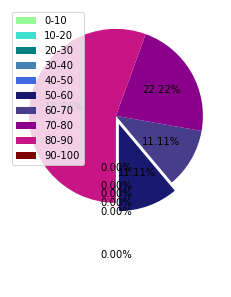

In [51]:
sizes = s
labels = cols
colors = ['PaleGreen','Turquoise', 'Teal', 'SteelBlue', 'RoyalBlue', 'MidnightBlue', 'DarkSlateBlue', 'DarkMagenta','MediumVioletRed','Maroon']
explode=(1,0.5,0.4,0.3,0.2,0.1,0.0,0.0,0.0,0.0)

plt.pie(sizes, explode=explode,colors=colors, autopct='%1.2f%%', startangle=270)
plt.legend(labels, loc='upper left')
plt.show()

## subject: 041

In [52]:
dist = []
for i in range(0,10):
    dist.append(len(df.loc[(df['041'] >= i*10) & (df['041'] < i*10+10)]))

In [53]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df1 = pd.DataFrame([], columns=cols)
for i in range(len(dist)):
    df1[cols[i]]=[dist[i]]
df1['Total Students'] = df1[df1.columns].sum(axis=1)
df1

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,Total Students
0,0,0,0,1,3,2,0,1,0,0,7


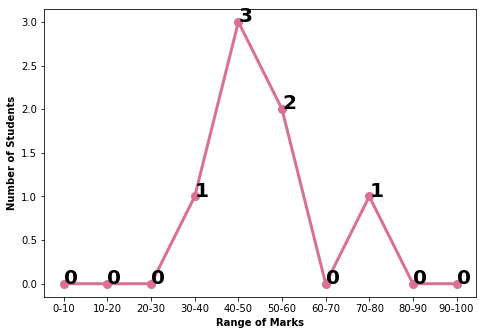

In [54]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

ax.set_xlabel('Range of Marks', fontweight='bold')
ax.set_ylabel('Number of Students', fontweight='bold')

for xy in zip(cols, s):                                       
    ax.annotate('%.0s%d' % xy, xy=xy, textcoords='data', fontsize=20, fontweight="bold")
    
plt.plot(cols, s, '-o', linewidth=3, markersize=8, color="PaleVioletRed")
plt.show()

In [55]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

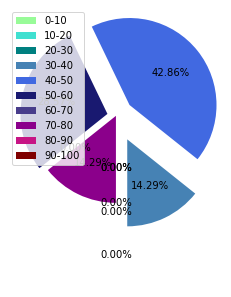

In [56]:
sizes = s
labels = cols
colors = ['PaleGreen','Turquoise', 'Teal', 'SteelBlue', 'RoyalBlue', 'MidnightBlue', 'DarkSlateBlue', 'DarkMagenta','MediumVioletRed','Maroon']
explode=(1,0.5,0.4,0.3,0.2,0.1,0.0,0.0,0.0,0.0)

plt.pie(sizes, explode=explode,colors=colors, autopct='%1.2f%%', startangle=270)
plt.legend(labels, loc='upper left')
plt.show()

## subject: 302

In [57]:
dist = []
for i in range(0,10):
    dist.append(len(df.loc[(df['302'] >= i*10) & (df['302'] < i*10+10)]))

In [58]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df1 = pd.DataFrame([], columns=cols)
for i in range(len(dist)):
    df1[cols[i]]=[dist[i]]
df1['Total Students'] = df1[df1.columns].sum(axis=1)
df1

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,Total Students
0,0,0,0,0,3,0,1,0,5,3,12


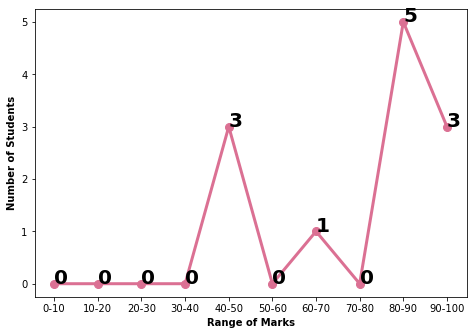

In [59]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

ax.set_xlabel('Range of Marks', fontweight='bold')
ax.set_ylabel('Number of Students', fontweight='bold')

for xy in zip(cols, s):                                       
    ax.annotate('%.0s%d' % xy, xy=xy, textcoords='data', fontsize=20, fontweight="bold")
    
plt.plot(cols, s, '-o', linewidth=3, markersize=8, color="PaleVioletRed")
plt.show()

In [60]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

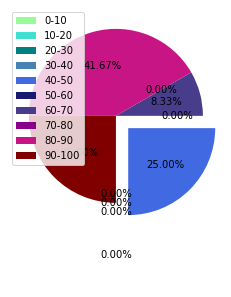

In [61]:
sizes = s
labels = cols
colors = ['PaleGreen','Turquoise', 'Teal', 'SteelBlue', 'RoyalBlue', 'MidnightBlue', 'DarkSlateBlue', 'DarkMagenta','MediumVioletRed','Maroon']
explode=(1,0.5,0.4,0.3,0.2,0.1,0.0,0.0,0.0,0.0)

plt.pie(sizes, explode=explode,colors=colors, autopct='%1.2f%%', startangle=270)
plt.legend(labels, loc='upper left')
plt.show()

## subject: 030

In [62]:
dist = []
for i in range(0,10):
    dist.append(len(df.loc[(df['030'] >= i*10) & (df['030'] < i*10+10)]))

In [63]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df1 = pd.DataFrame([], columns=cols)
for i in range(len(dist)):
    df1[cols[i]]=[dist[i]]
df1['Total Students'] = df1[df1.columns].sum(axis=1)
df1

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,Total Students
0,0,0,0,1,2,2,7,10,4,1,27


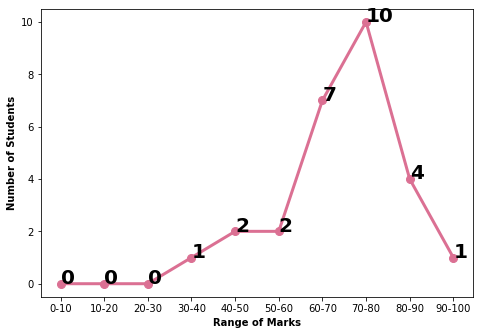

In [64]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

ax.set_xlabel('Range of Marks', fontweight='bold')
ax.set_ylabel('Number of Students', fontweight='bold')

for xy in zip(cols, s):                                       
    ax.annotate('%.0s%d' % xy, xy=xy, textcoords='data', fontsize=20, fontweight="bold")
    
plt.plot(cols, s, '-o', linewidth=3, markersize=8, color="PaleVioletRed")
plt.show()

In [65]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

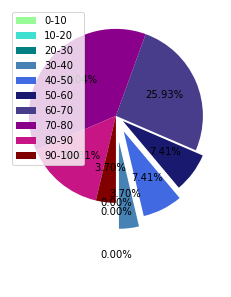

In [66]:
sizes = s
labels = cols
colors = ['PaleGreen','Turquoise', 'Teal', 'SteelBlue', 'RoyalBlue', 'MidnightBlue', 'DarkSlateBlue', 'DarkMagenta','MediumVioletRed','Maroon']
explode=(1,0.5,0.4,0.3,0.2,0.1,0.0,0.0,0.0,0.0)

plt.pie(sizes, explode=explode,colors=colors, autopct='%1.2f%%', startangle=270)
plt.legend(labels, loc='upper left')
plt.show()

## subject: 301

In [67]:
dist = []
for i in range(0,10):
    dist.append(len(df.loc[(df['301'] >= i*10) & (df['301'] < i*10+10)]))

In [68]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df1 = pd.DataFrame([], columns=cols)
for i in range(len(dist)):
    df1[cols[i]]=[dist[i]]
df1['Total Students'] = df1[df1.columns].sum(axis=1)
df1

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,Total Students
0,0,0,0,1,4,8,8,14,13,6,54


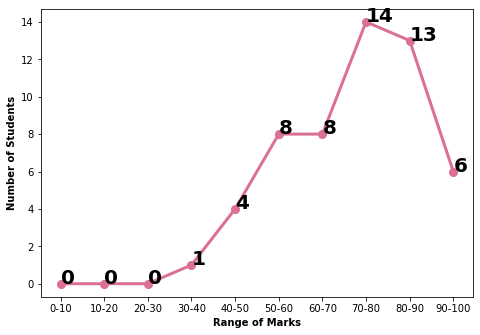

In [69]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

ax.set_xlabel('Range of Marks', fontweight='bold')
ax.set_ylabel('Number of Students', fontweight='bold')

for xy in zip(cols, s):                                       
    ax.annotate('%.0s%d' % xy, xy=xy, textcoords='data', fontsize=20, fontweight="bold")
    
plt.plot(cols, s, '-o', linewidth=3, markersize=8, color="PaleVioletRed")
plt.show()

In [70]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

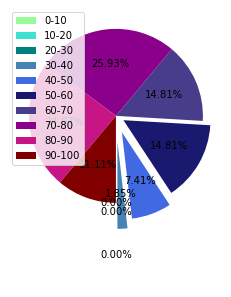

In [71]:
sizes = s
labels = cols
colors = ['PaleGreen','Turquoise', 'Teal', 'SteelBlue', 'RoyalBlue', 'MidnightBlue', 'DarkSlateBlue', 'DarkMagenta','MediumVioletRed','Maroon']
explode=(1,0.5,0.4,0.3,0.2,0.1,0.0,0.0,0.0,0.0)

plt.pie(sizes, explode=explode,colors=colors, autopct='%1.2f%%', startangle=270)
plt.legend(labels, loc='upper left')
plt.show()

## subject: 027

In [72]:
dist = []
for i in range(0,10):
    dist.append(len(df.loc[(df['027'] >= i*10) & (df['027'] < i*10+10)]))

In [73]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df1 = pd.DataFrame([], columns=cols)
for i in range(len(dist)):
    df1[cols[i]]=[dist[i]]
df1['Total Students'] = df1[df1.columns].sum(axis=1)
df1

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,Total Students
0,0,0,0,2,8,9,9,7,1,2,38


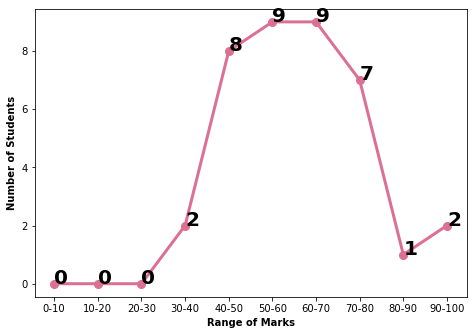

In [74]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

ax.set_xlabel('Range of Marks', fontweight='bold')
ax.set_ylabel('Number of Students', fontweight='bold')

for xy in zip(cols, s):                                       
    ax.annotate('%.0s%d' % xy, xy=xy, textcoords='data', fontsize=20, fontweight="bold")
    
plt.plot(cols, s, '-o', linewidth=3, markersize=8, color="PaleVioletRed")
plt.show()

In [75]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

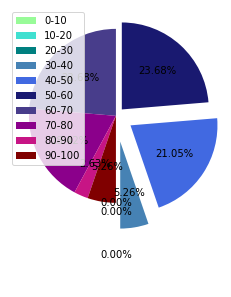

In [76]:
sizes = s
labels = cols
colors = ['PaleGreen','Turquoise', 'Teal', 'SteelBlue', 'RoyalBlue', 'MidnightBlue', 'DarkSlateBlue', 'DarkMagenta','MediumVioletRed','Maroon']
explode=(1,0.5,0.4,0.3,0.2,0.1,0.0,0.0,0.0,0.0)

plt.pie(sizes, explode=explode,colors=colors, autopct='%1.2f%%', startangle=270)
plt.legend(labels, loc='upper left')
plt.show()

## subject: 028

In [77]:
dist = []
for i in range(0,10):
    dist.append(len(df.loc[(df['028'] >= i*10) & (df['028'] < i*10+10)]))

In [78]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df1 = pd.DataFrame([], columns=cols)
for i in range(len(dist)):
    df1[cols[i]]=[dist[i]]
df1['Total Students'] = df1[df1.columns].sum(axis=1)
df1

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,Total Students
0,0,0,0,0,3,7,2,11,8,1,32


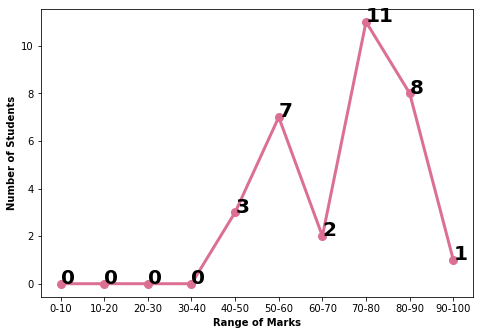

In [79]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

ax.set_xlabel('Range of Marks', fontweight='bold')
ax.set_ylabel('Number of Students', fontweight='bold')

for xy in zip(cols, s):                                       
    ax.annotate('%.0s%d' % xy, xy=xy, textcoords='data', fontsize=20, fontweight="bold")
    
plt.plot(cols, s, '-o', linewidth=3, markersize=8, color="PaleVioletRed")
plt.show()

In [80]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

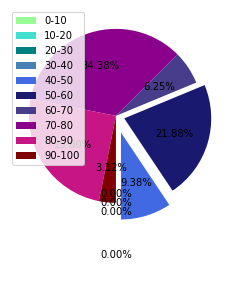

In [81]:
sizes = s
labels = cols
colors = ['PaleGreen','Turquoise', 'Teal', 'SteelBlue', 'RoyalBlue', 'MidnightBlue', 'DarkSlateBlue', 'DarkMagenta','MediumVioletRed','Maroon']
explode=(1,0.5,0.4,0.3,0.2,0.1,0.0,0.0,0.0,0.0)

plt.pie(sizes, explode=explode,colors=colors, autopct='%1.2f%%', startangle=270)
plt.legend(labels, loc='upper left')
plt.show()

## subject: 104

In [82]:
dist = []
for i in range(0,10):
    dist.append(len(df.loc[(df['104'] >= i*10) & (df['104'] < i*10+10)]))

In [83]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df1 = pd.DataFrame([], columns=cols)
for i in range(len(dist)):
    df1[cols[i]]=[dist[i]]
df1['Total Students'] = df1[df1.columns].sum(axis=1)
df1

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,Total Students
0,0,0,0,0,0,1,1,0,3,0,5


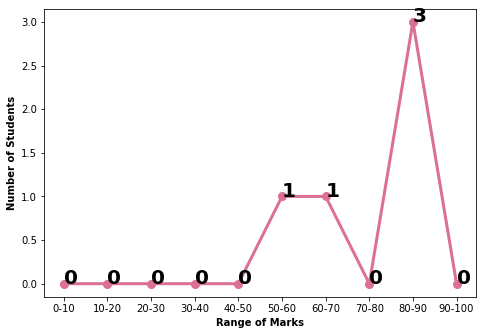

In [84]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

ax.set_xlabel('Range of Marks', fontweight='bold')
ax.set_ylabel('Number of Students', fontweight='bold')

for xy in zip(cols, s):                                       
    ax.annotate('%.0s%d' % xy, xy=xy, textcoords='data', fontsize=20, fontweight="bold")
    
plt.plot(cols, s, '-o', linewidth=3, markersize=8, color="PaleVioletRed")
plt.show()

In [85]:
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
s= []

for i in range(len(cols)):
    s.append(df1[cols[i]][0])

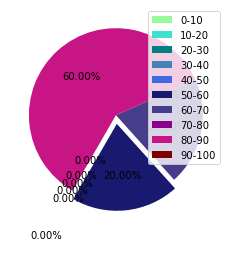

In [86]:
sizes = s
labels = cols
colors = ['PaleGreen','Turquoise', 'Teal', 'SteelBlue', 'RoyalBlue', 'MidnightBlue', 'DarkSlateBlue', 'DarkMagenta','MediumVioletRed','Maroon']
explode=(1,0.5,0.4,0.3,0.2,0.1,0.0,0.0,0.0,0.0)

plt.pie(sizes, explode=explode,colors=colors, autopct='%1.2f%%', startangle=240)
plt.legend(labels, loc='best')
plt.show()

## Some useful data

### Number of Male and Female Students

F    28
M    27
Name: Sex, dtype: int64


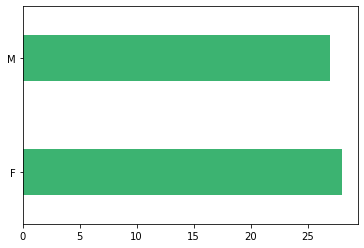

In [87]:
n=df['Sex'].value_counts()
print(n)

n.plot.barh(color='mediumseagreen',width=0.4)

### Top 10 Students

In [88]:
df1= df.sort_values(by=['%age'],ascending=False)
df1.head(10)

,Roll No,Name,Sex,Category,039,048,029,064,041,302,030,301,027,028,104,Total,%age,Result
34,13688241,TANISH KUMAR GUPTA,M,G,NaN,NaN,96.0,NaN,NaN,95.0,NaN,86.0,95.0,94.0,NaN,466.0,93.2,PASS
1,13688208,KOMAL,F,G,NaN,NaN,NaN,NaN,NaN,91.0,88.0,94.0,90.0,88.0,NaN,451.0,90.2,PASS
39,13688246,SARVINDER SINGH,M,G,NaN,95.0,92.0,NaN,NaN,NaN,NaN,89.0,85.0,88.0,NaN,449.0,89.8,PASS
8,13688215,SIMRAN KAUR,F,G,90.0,NaN,NaN,88.0,NaN,NaN,88.0,91.0,NaN,NaN,89.0,446.0,89.2,PASS
22,13688229,LALITA,F,SC,88.0,NaN,NaN,86.0,NaN,NaN,92.0,82.0,NaN,NaN,89.0,437.0,87.4,PASS
20,13688227,BHAVNA SAINI,F,G,NaN,NaN,NaN,88.0,NaN,NaN,78.0,90.0,NaN,87.0,89.0,432.0,86.4,PASS
3,13688210,PRISHITA,F,G,NaN,NaN,NaN,85.0,NaN,90.0,85.0,92.0,NaN,77.0,NaN,429.0,85.8,PASS
7,13688214,RITU,F,SC,84.0,NaN,NaN,82.0,NaN,84.0,77.0,89.0,NaN,NaN,NaN,416.0,83.2,PASS
11,13688218,PRAGATI TIWARI,F,G,NaN,NaN,88.0,NaN,NaN,86.0,NaN,91.0,67.0,81.0,NaN,413.0,82.6,PASS
4,13688211,ANANTHA LAKSHMI MK,F,G,NaN,NaN,87.0,NaN,NaN,86.0,NaN,94.0,69.0,76.0,NaN,412.0,82.4,PASS


### Bottom 10 Students

In [89]:
df1.tail(10)

,Roll No,Name,Sex,Category,039,048,029,064,041,302,030,301,027,028,104,Total,%age,Result
16,13688223,SIMMI,F,G,57.0,49.0,63.0,NaN,NaN,NaN,NaN,61.0,51.0,NaN,NaN,281.0,56.2,PASS
24,13688231,ANIKET,M,SC,54.0,59.0,57.0,NaN,NaN,NaN,NaN,55.0,47.0,NaN,NaN,272.0,54.4,PASS
49,13688256,ANUPAM KUMAR DUBEY,M,G,NaN,52.0,55.0,NaN,NaN,NaN,NaN,52.0,46.0,56.0,NaN,261.0,52.2,PASS
48,13688255,BHAVYA AGNIHOTRI,M,G,NaN,54.0,NaN,NaN,NaN,NaN,33.0,70.0,48.0,47.0,NaN,252.0,50.4,COMP 030
46,13688253,NITIN KUMAR,M,SC,NaN,56.0,NaN,NaN,NaN,NaN,49.0,52.0,36.0,48.0,NaN,241.0,48.2,COMP 027
21,13688228,AARTI DEVI,F,SC,49.0,NaN,NaN,52.0,NaN,48.0,47.0,44.0,NaN,NaN,NaN,240.0,48.0,PASS
44,13688251,SAGAR SHARMA,M,G,45.0,NaN,52.0,NaN,NaN,48.0,NaN,43.0,46.0,NaN,NaN,234.0,46.8,PASS
52,13688259,RESHMA,F,SC,NaN,NaN,51.0,NaN,NaN,48.0,NaN,30.0,46.0,44.0,NaN,219.0,43.8,COMP 301
51,13688258,ANCHAL,F,G,40.0,39.0,47.0,NaN,NaN,NaN,NaN,47.0,35.0,NaN,NaN,208.0,41.6,ESSENTIAL REPEAT
2,13688209,SUKANTI,F,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,R.L.


### Top 10 Female Students

In [90]:
df1.loc[df['Sex']=='F'].head(10)

,Roll No,Name,Sex,Category,039,048,029,064,041,302,030,301,027,028,104,Total,%age,Result
1,13688208,KOMAL,F,G,NaN,NaN,NaN,NaN,NaN,91.0,88.0,94.0,90.0,88.0,NaN,451.0,90.2,PASS
8,13688215,SIMRAN KAUR,F,G,90.0,NaN,NaN,88.0,NaN,NaN,88.0,91.0,NaN,NaN,89.0,446.0,89.2,PASS
22,13688229,LALITA,F,SC,88.0,NaN,NaN,86.0,NaN,NaN,92.0,82.0,NaN,NaN,89.0,437.0,87.4,PASS
20,13688227,BHAVNA SAINI,F,G,NaN,NaN,NaN,88.0,NaN,NaN,78.0,90.0,NaN,87.0,89.0,432.0,86.4,PASS
3,13688210,PRISHITA,F,G,NaN,NaN,NaN,85.0,NaN,90.0,85.0,92.0,NaN,77.0,NaN,429.0,85.8,PASS
7,13688214,RITU,F,SC,84.0,NaN,NaN,82.0,NaN,84.0,77.0,89.0,NaN,NaN,NaN,416.0,83.2,PASS
11,13688218,PRAGATI TIWARI,F,G,NaN,NaN,88.0,NaN,NaN,86.0,NaN,91.0,67.0,81.0,NaN,413.0,82.6,PASS
4,13688211,ANANTHA LAKSHMI MK,F,G,NaN,NaN,87.0,NaN,NaN,86.0,NaN,94.0,69.0,76.0,NaN,412.0,82.4,PASS
5,13688212,ANJALI,F,G,80.0,NaN,83.0,NaN,77.0,80.0,NaN,81.0,NaN,NaN,NaN,401.0,80.2,PASS
13,13688220,VANSHITA SHARMA,F,G,81.0,84.0,NaN,79.0,NaN,NaN,71.0,80.0,NaN,NaN,NaN,395.0,79.0,PASS


### Top 10 Male Students

In [91]:
df1.loc[df['Sex']=='F'].head(10)

,Roll No,Name,Sex,Category,039,048,029,064,041,302,030,301,027,028,104,Total,%age,Result
1,13688208,KOMAL,F,G,NaN,NaN,NaN,NaN,NaN,91.0,88.0,94.0,90.0,88.0,NaN,451.0,90.2,PASS
8,13688215,SIMRAN KAUR,F,G,90.0,NaN,NaN,88.0,NaN,NaN,88.0,91.0,NaN,NaN,89.0,446.0,89.2,PASS
22,13688229,LALITA,F,SC,88.0,NaN,NaN,86.0,NaN,NaN,92.0,82.0,NaN,NaN,89.0,437.0,87.4,PASS
20,13688227,BHAVNA SAINI,F,G,NaN,NaN,NaN,88.0,NaN,NaN,78.0,90.0,NaN,87.0,89.0,432.0,86.4,PASS
3,13688210,PRISHITA,F,G,NaN,NaN,NaN,85.0,NaN,90.0,85.0,92.0,NaN,77.0,NaN,429.0,85.8,PASS
7,13688214,RITU,F,SC,84.0,NaN,NaN,82.0,NaN,84.0,77.0,89.0,NaN,NaN,NaN,416.0,83.2,PASS
11,13688218,PRAGATI TIWARI,F,G,NaN,NaN,88.0,NaN,NaN,86.0,NaN,91.0,67.0,81.0,NaN,413.0,82.6,PASS
4,13688211,ANANTHA LAKSHMI MK,F,G,NaN,NaN,87.0,NaN,NaN,86.0,NaN,94.0,69.0,76.0,NaN,412.0,82.4,PASS
5,13688212,ANJALI,F,G,80.0,NaN,83.0,NaN,77.0,80.0,NaN,81.0,NaN,NaN,NaN,401.0,80.2,PASS
13,13688220,VANSHITA SHARMA,F,G,81.0,84.0,NaN,79.0,NaN,NaN,71.0,80.0,NaN,NaN,NaN,395.0,79.0,PASS


### Top 5 Scores in Each Subject

In [92]:
for sub in subs:
    df1= df.sort_values(by=[sub],ascending=False)
    print(df1[sub].head(5))
    print()

8     90.0
22    88.0
7     84.0
29    82.0
13    81.0
Name: 039, dtype: float64

39    95.0
29    90.0
33    88.0
35    87.0
54    87.0
Name: 048, dtype: float64

34    96.0
39    92.0
11    88.0
4     87.0
29    84.0
Name: 029, dtype: float64

8     88.0
20    88.0
22    86.0
3     85.0
7     82.0
Name: 064, dtype: float64

5     77.0
12    50.0
43    50.0
30    49.0
41    47.0
Name: 041, dtype: float64

34    95.0
1     91.0
3     90.0
4     86.0
11    86.0
Name: 302, dtype: float64

22    92.0
8     88.0
1     88.0
3     85.0
12    81.0
Name: 030, dtype: float64

1     94.0
4     94.0
3     92.0
11    91.0
8     91.0
Name: 301, dtype: float64

34    95.0
1     90.0
39    85.0
36    79.0
42    77.0
Name: 027, dtype: float64

34    94.0
42    89.0
1     88.0
39    88.0
20    87.0
Name: 028, dtype: float64

8     89.0
20    89.0
22    89.0
31    69.0
26    57.0
Name: 104, dtype: float64



### Mean Percentage

In [93]:
m = df.loc[df['Sex']=='M']
meanm = sum(m['%age'])/len(m)
f = df.loc[df['Sex']=='F']
meanf = sum(f['%age'])/len(f)
print('Average percentage obtained by male students:', meanm)
print('Average percentage obtained by female students:', meanf)

Average percentage obtained by male students: 68.25185185185185
Average percentage obtained by female students: 68.67857142857144


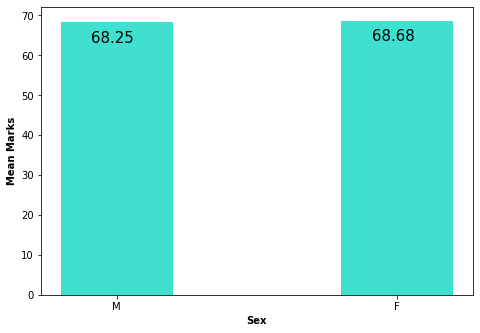

In [94]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Sex', fontweight='bold')
ax.set_ylabel('Mean Marks', fontweight='bold')

bars = plt.bar(['M', 'F'], [meanm, meanf], width=0.4, color='Turquoise')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.11, yval -5 , str("%.2f" % round(yval,2)), fontsize=15)

plt.show()

## More on student result

In [95]:
appeared = []
for sub in subs:
    appeared.append(len(df[sub].dropna()))

In [96]:
npass = df.loc[df['Result']!='PASS']
comp = [n for n in npass['Result'] if 'COMP' in n]
rl = [n for n in npass['Result'] if 'R.L.' in n]
er = [n for n in npass['Result'] if 'ESS' in n]

### Students with Compartments

In [97]:
comp_subs=['COMP 041', 'COMP 027', 'COMP 030', 'COMP 301']
c = npass.loc[npass["Result"].isin(comp_subs)]
c

,Roll No,Name,Sex,Category,039,048,029,064,041,302,030,301,027,028,104,Total,%age,Result
14,13688221,RAVREET KAUR,F,G,NaN,75.0,NaN,NaN,40.0,NaN,67.0,81.0,NaN,56.0,NaN,319.0,63.8,COMP 041
46,13688253,NITIN KUMAR,M,SC,NaN,56.0,NaN,NaN,NaN,NaN,49.0,52.0,36.0,48.0,NaN,241.0,48.2,COMP 027
47,13688254,ANKUSH SURYA,M,G,NaN,73.0,NaN,NaN,35.0,NaN,69.0,74.0,NaN,68.0,NaN,319.0,63.8,COMP 041
48,13688255,BHAVYA AGNIHOTRI,M,G,NaN,54.0,NaN,NaN,NaN,NaN,33.0,70.0,48.0,47.0,NaN,252.0,50.4,COMP 030
52,13688259,RESHMA,F,SC,NaN,NaN,51.0,NaN,NaN,48.0,NaN,30.0,46.0,44.0,NaN,219.0,43.8,COMP 301


### Students with Essential Repeats

In [98]:
npass.loc[npass['Result']=='ESSENTIAL REPEAT']

,Roll No,Name,Sex,Category,039,048,029,064,041,302,030,301,027,028,104,Total,%age,Result
51,13688258,ANCHAL,F,G,40.0,39.0,47.0,NaN,NaN,NaN,NaN,47.0,35.0,NaN,NaN,208.0,41.6,ESSENTIAL REPEAT


### Students with R.L.s

In [99]:
npass.loc[npass['Result']=='R.L.']

,Roll No,Name,Sex,Category,039,048,029,064,041,302,030,301,027,028,104,Total,%age,Result
2,13688209,SUKANTI,F,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,R.L.


### Total Appeared and Total Compartments in each subject:

In [100]:
cs = ['041', '027', '030', '301']
for i in range(len(subs)):
    print('SUBJECT CODE:', subs[i],'\n')
    print('Total appeared:', appeared[i])
    if subs[i] in cs:
        x=0
        for s in c['Result']:
            if subs[i] in s: x+=1
        print('Total compartments:', x)
    else:
        print('Total compartments:', 0)
    print('\n________________________________________\n')

SUBJECT CODE: 039 

Total appeared: 22
Total compartments: 0

________________________________________

SUBJECT CODE: 048 

Total appeared: 37
Total compartments: 0

________________________________________

SUBJECT CODE: 029 

Total appeared: 27
Total compartments: 0

________________________________________

SUBJECT CODE: 064 

Total appeared: 9
Total compartments: 0

________________________________________

SUBJECT CODE: 041 

Total appeared: 7
Total compartments: 2

________________________________________

SUBJECT CODE: 302 

Total appeared: 12
Total compartments: 0

________________________________________

SUBJECT CODE: 030 

Total appeared: 27
Total compartments: 1

________________________________________

SUBJECT CODE: 301 

Total appeared: 54
Total compartments: 1

________________________________________

SUBJECT CODE: 027 

Total appeared: 38
Total compartments: 1

________________________________________

SUBJECT CODE: 028 

Total appeared: 32
Total compartments: 0

____

# MALE STUDENTS' INFORMATION

### General Males in various percentage ranges

In [101]:
percentagesMG = []
for i in range(0,10):
    percentagesMG.append(len(df.loc[(df['%age'] >= i*10) & (df['%age'] < i*10+10) & (df['Sex']=='M') & (df['Category']=='G')]))
dfa = pd.DataFrame(np.array(percentagesMG).reshape(1,10), columns=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
dfa

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100
0,0,0,0,0,1,2,5,8,1,1


### SC Males in various percentage ranges

In [102]:
percentagesMS = []
for i in range(0,10):
    percentagesMS.append(len(df.loc[(df['%age'] >= i*10) & (df['%age'] < i*10+10) & (df['Sex']=='M') & (df['Category']=='SC')]))
percentagesMS
dfb = pd.DataFrame(np.array(percentagesMS).reshape(1,10), columns=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
dfb

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100
0,0,0,0,0,1,2,3,3,0,0


### OBC Males in various percentage ranges

In [103]:
percentagesMO = []
for i in range(0,10):
    percentagesMO.append(len(df.loc[(df['%age'] >= i*10) & (df['%age'] < i*10+10) & (df['Sex']=='M') & (df['Category']=='OBC')]))
percentagesMO
dfc = pd.DataFrame(np.array(percentagesMO).reshape(1,10), columns=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
dfc

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100
0,0,0,0,0,0,0,0,0,0,0


## Male students percentage ranges table

In [104]:
ranges=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100', 'Total']
df1 = pd.DataFrame(np.arange(55).reshape(11,5), columns=(['General', 'SC', 'OBC', 'Ranges', 'Total']))
df1['Ranges'][0]='hello'
for i in range(11):
    df1['Ranges'][i]=ranges[i]
    
percentagesMG.append(sum(percentagesMG))
percentagesMO.append(sum(percentagesMO))
percentagesMS.append(sum(percentagesMS))
df1['General']=percentagesMG
df1['SC']=percentagesMS
df1['OBC']=percentagesMO
df1['Total']=df1[['General','OBC','SC']].sum(axis=1)
df1.set_index('Ranges')

<ipython-input-104-3f5d521d2ff5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Ranges'][i]=ranges[i]


,General,SC,OBC,Total
Ranges,,,,
0-10,0,0,0,0
10-20,0,0,0,0
20-30,0,0,0,0
30-40,0,0,0,0
40-50,1,1,0,2
50-60,2,2,0,4
60-70,5,3,0,8
70-80,8,3,0,11
80-90,1,0,0,1


## Graphical Representation of Male Students' Percentages

In [105]:
percentagesMG.pop()
percentagesMS.pop()
percentagesMO.pop()

0

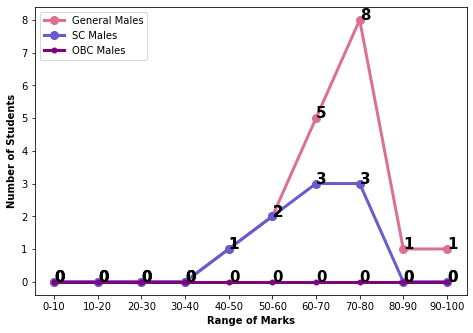

In [106]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

s= []

for i in range(len(cols)):
    s.append(df1['General'][i])

ax.set_xlabel('Range of Marks', fontweight='bold')
ax.set_ylabel('Number of Students', fontweight='bold')

for xy in zip(cols, s):                                       
    ax.annotate('%.0s%d' % xy, xy=xy, textcoords='data', fontsize=15, fontweight="bold")
    
plt.plot(cols, s, '-o', linewidth=3, markersize=8, color="PaleVioletRed")

s= []

for i in range(len(cols)):
    s.append(df1['SC'][i])

for xy in zip(cols, s):                                       
    ax.annotate('%.0s%d' % xy, xy=xy, textcoords='data', fontsize=15, fontweight="bold")
    
plt.plot(cols, s, '-o', linewidth=3, markersize=8, color="SlateBlue")

s= []

for i in range(len(cols)):
    s.append(df1['OBC'][i])

for xy in zip(cols, s):                                       
    ax.annotate('%.0s%d' % xy, xy=xy, textcoords='data', fontsize=15, fontweight="bold")
    
plt.plot(cols, s, '-o', linewidth=3, markersize=5, color="Purple")

ax.legend(['General Males','SC Males','OBC Males'])
plt.show()

# FEMALE STUDENT'S INFORMATION

### General Females in various percentage ranges

In [107]:
percentagesFG = []
for i in range(0,10):
    percentagesFG.append(len(df.loc[(df['%age'] >= i*10) & (df['%age'] < i*10+10) & (df['Sex']=='F') & (df['Category']=='G')]))
percentagesFG
dfa = pd.DataFrame(np.array(percentagesFG).reshape(1,10), columns=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
dfa

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100
0,1,0,0,0,1,2,6,4,6,1


### SC Females in various percentage ranges

In [108]:
percentagesFS = []
for i in range(0,10):
    percentagesFS.append(len(df.loc[(df['%age'] >= i*10) & (df['%age'] < i*10+10) & (df['Sex']=='F') & (df['Category']=='SC')]))
percentagesFS
dfa = pd.DataFrame(np.array(percentagesFS).reshape(1,10), columns=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
dfa

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100
0,0,0,0,0,2,0,0,2,2,0


###  OBC Females in various percentage ranges

In [109]:
percentagesFO = []
for i in range(0,10):
    percentagesFO.append(len(df.loc[(df['%age'] >= i*10) & (df['%age'] < i*10+10) & (df['Sex']=='F') & (df['Category']=='OBC')]))
percentagesFO
dfa = pd.DataFrame(np.array(percentagesFO).reshape(1,10), columns=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
dfa

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100
0,0,0,0,0,0,0,1,0,0,0


In [110]:
### Female Students Percentages Table

In [111]:
ranges=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100', 'Total']
df1 = pd.DataFrame(np.arange(55).reshape(11,5), columns=(['General', 'SC', 'OBC', 'Ranges', 'Total']))
df1['Ranges'][0]='hello'
for i in range(11):
    df1['Ranges'][i]=ranges[i]

percentagesFG.append(sum(percentagesFG))
percentagesFO.append(sum(percentagesFO))
percentagesFS.append(sum(percentagesFS))
    
df1['General']=percentagesFG
df1['SC']=percentagesFS
df1['OBC']=percentagesFO
df1['Total']=df1[['General','OBC','SC']].sum(axis=1)
df1.set_index('Ranges')

<ipython-input-111-63b22a7131e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Ranges'][i]=ranges[i]


,General,SC,OBC,Total
Ranges,,,,
0-10,1,0,0,1
10-20,0,0,0,0
20-30,0,0,0,0
30-40,0,0,0,0
40-50,1,2,0,3
50-60,2,0,0,2
60-70,6,0,1,7
70-80,4,2,0,6
80-90,6,2,0,8


In [112]:
percentagesFG.pop()
percentagesFS.pop()
percentagesFO.pop()

1

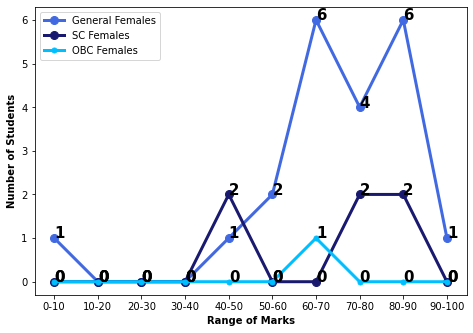

In [113]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cols=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

s= []

for i in range(len(cols)):
    s.append(df1['General'][i])

ax.set_xlabel('Range of Marks', fontweight='bold')
ax.set_ylabel('Number of Students', fontweight='bold')

for xy in zip(cols, s):                                       
    ax.annotate('%.0s%d' % xy, xy=xy, textcoords='data', fontsize=15, fontweight="bold")
    
plt.plot(cols, s, '-o', linewidth=3, markersize=8, color="RoyalBlue")

s= []

for i in range(len(cols)):
    s.append(df1['SC'][i])

for xy in zip(cols, s):                                       
    ax.annotate('%.0s%d' % xy, xy=xy, textcoords='data', fontsize=15, fontweight="bold")
    
plt.plot(cols, s, '-o', linewidth=3, markersize=8, color="MidnightBlue")

s= []

for i in range(len(cols)):
    s.append(df1['OBC'][i])

for xy in zip(cols, s):                                       
    ax.annotate('%.0s%d' % xy, xy=xy, textcoords='data', fontsize=15, fontweight="bold")
    
plt.plot(cols, s, '-o', linewidth=3, markersize=5, color="DeepSkyBlue")
ax.legend(['General Females','SC Females','OBC Females'])
plt.show()

In [114]:
df.head()

,Roll No,Name,Sex,Category,039,048,029,064,041,302,030,301,027,028,104,Total,%age,Result
0,13688207,POOJA,F,G,68.0,68.0,NaN,NaN,NaN,NaN,60.0,79.0,54.0,NaN,NaN,329.0,65.8,PASS
1,13688208,KOMAL,F,G,NaN,NaN,NaN,NaN,NaN,91.0,88.0,94.0,90.0,88.0,NaN,451.0,90.2,PASS
2,13688209,SUKANTI,F,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,R.L.
3,13688210,PRISHITA,F,G,NaN,NaN,NaN,85.0,NaN,90.0,85.0,92.0,NaN,77.0,NaN,429.0,85.8,PASS
4,13688211,ANANTHA LAKSHMI MK,F,G,NaN,NaN,87.0,NaN,NaN,86.0,NaN,94.0,69.0,76.0,NaN,412.0,82.4,PASS


In [115]:
df_new=df[['Roll No', 'Name', 'Sex', 'Category', 'Result']]

In [116]:
df_new.head()

,Roll No,Name,Sex,Category,Result
0,13688207,POOJA,F,G,PASS
1,13688208,KOMAL,F,G,PASS
2,13688209,SUKANTI,F,G,R.L.
3,13688210,PRISHITA,F,G,PASS
4,13688211,ANANTHA LAKSHMI MK,F,G,PASS


In [117]:
#df.insert(loc, column, value) to insert a column at a specific position

df_new.insert(loc = 2, column="Father's Name", value=[None]*len(df_new))
df_new['Contact No.']=[None]*len(df_new)

<ipython-input-117-6d9359c498db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Contact No.']=[None]*len(df_new)


In [118]:
df_new.head()

,Roll No,Name,Father's Name,Sex,Category,Result,Contact No.
0,13688207,POOJA,None,F,G,PASS,None
1,13688208,KOMAL,None,F,G,PASS,None
2,13688209,SUKANTI,None,F,G,R.L.,None
3,13688210,PRISHITA,None,F,G,PASS,None
4,13688211,ANANTHA LAKSHMI MK,None,F,G,PASS,None


In [119]:
df_new['Father\'s Name']=[8888]*len(df_new)

<ipython-input-119-67727eb7d17f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Father\'s Name']=[8888]*len(df_new)


In [120]:
df_new.head()

,Roll No,Name,Father's Name,Sex,Category,Result,Contact No.
0,13688207,POOJA,8888,F,G,PASS,None
1,13688208,KOMAL,8888,F,G,PASS,None
2,13688209,SUKANTI,8888,F,G,R.L.,None
3,13688210,PRISHITA,8888,F,G,PASS,None
4,13688211,ANANTHA LAKSHMI MK,8888,F,G,PASS,None


In [123]:
df_new.head()

,Roll No,Name,Father's Name,Sex,Category,Result,Contact No.
0,13688207,POOJA,8888,F,G,PASS,None
1,13688208,KOMAL,8888,F,G,PASS,None
2,13688209,SUKANTI,8888,F,G,R.L.,None
3,13688210,PRISHITA,8888,F,G,PASS,None
4,13688211,ANANTHA LAKSHMI MK,8888,F,G,PASS,None


In [131]:
df_new.to_excel(r'C:\Users\CHAHAT KALSI\Desktop\export_dataframe.xlsx', encoding='UTF-8')

In [126]:
!pip install openpyxl

You should consider upgrading via the 'C:\Users\CHAHAT KALSI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8920 sha256=b219b4d7360d58256502735ecc578c218380b578facc3c138a1000e8743fbbc1
  Stored in directory: c:\users\chahat kalsi\appdata\local\pip\cache\wheels\6e\df\38\abda47b884e3e25f9f9b6430e5ce44c47670758a50c0c51759
Successfully built et-xmlfile
